In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Processing
Reading and joining both datastets: (1) Ads details and (2) Property details.

In [38]:
# Read clean data
df = pd.read_csv('clean_data.csv', sep=',', encoding='latin1')
df.head()

,Reference Number,City,House Type,Available From,Price,Additional Info,Ad Title,Link,Specific Location
0,893996,barcelona,Apartment,From 29 April,3040,bills included,3-bedroom apartment for rent in Sant Gervasi B...,https://www.spotahome.com/barcelona/for-rent:a...,Sant Gervasi
1,480286,barcelona,Room,From 3 July,699,instant booking,Rooms for rent in 7-bedroom apartment in Barce...,https://www.spotahome.com/barcelona/for-rent:r...,Barcelona
2,1091471,barcelona,Room,From 2 March,630,instant booking,Rooms for rent in shared 6-bedroom apartment i...,https://www.spotahome.com/barcelona/for-rent:r...,Ciutat Vella
3,1091473,barcelona,Room,From 2 March,590,instant booking,Rooms for rent in shared 6-bedroom apartment i...,https://www.spotahome.com/barcelona/for-rent:r...,Ciutat Vella
4,573720,barcelona,Room,From 1 July,580,bills included,Rooms for rent in 25-bedroom house in Bellater...,https://www.spotahome.com/barcelona/for-rent:r...,Bellaterra


In [39]:
print(f' Original length: {len(df)}.')
df = df.drop_duplicates()
print(f'Length after removing duplicates: {len(df)}.')

 Original length: 6567.
Length after removing duplicates: 5742.


In [40]:
# Read additional data
property_data = pd.read_csv('additional_rental_data.csv', sep=';')
property_data.head()

,Reference Number,Bedrooms,Bathrooms,Area
0,893996,3,2,110
1,480286,7,5,160
2,1091471,6,1,100
3,1091473,6,1,100
4,573720,20,15,1000


In [41]:
print(f' Original length: {len(property_data)}.')
property_data = property_data.drop_duplicates()
print(f'Length after removing duplicates: {len(property_data)}.')

 Original length: 6561.
Length after removing duplicates: 5738.


In [42]:
# Concat data
merged_df = pd.merge(df, property_data, on='Reference Number', how='inner')
merged_df

,Reference Number,City,House Type,Available From,Price,Additional Info,Ad Title,Link,Specific Location,Bedrooms,Bathrooms,Area
0,893996,barcelona,Apartment,From 29 April,3040,bills included,3-bedroom apartment for rent in Sant Gervasi B...,https://www.spotahome.com/barcelona/for-rent:a...,Sant Gervasi,3,2,110
1,480286,barcelona,Room,From 3 July,699,instant booking,Rooms for rent in 7-bedroom apartment in Barce...,https://www.spotahome.com/barcelona/for-rent:r...,Barcelona,7,5,160
2,1091471,barcelona,Room,From 2 March,630,instant booking,Rooms for rent in shared 6-bedroom apartment i...,https://www.spotahome.com/barcelona/for-rent:r...,Ciutat Vella,6,1,100
3,1091473,barcelona,Room,From 2 March,590,instant booking,Rooms for rent in shared 6-bedroom apartment i...,https://www.spotahome.com/barcelona/for-rent:r...,Ciutat Vella,6,1,100
4,573720,barcelona,Room,From 1 July,580,bills included,Rooms for rent in 25-bedroom house in Bellater...,https://www.spotahome.com/barcelona/for-rent:r...,Bellaterra,20,15,1000
...,...,...,...,...,...,...,...,...,...,...,...,...
5733,938868,barcelona,Apartment,From 7 March 2025,5070,no deposit,3-bedroom apartment for rent in Eixample Barce...,https://www.spotahome.com/barcelona/for-rent:a...,Eixample,3,2,156
5734,84411,barcelona,Apartment,From 8 March 2025,4000,some bills included,Bright 2-bedroom apartment in Gracia Barcelona,https://www.spotahome.com/barcelona/for-rent:a...,Gracia,2,1,50
5735,84410,barcelona,Apartment,From 8 March 2025,4000,some bills included,Bright 2-bedroom apartment in Gracia Barcelona,https://www.spotahome.com/barcelona/for-rent:a...,Gracia,2,1,60
5736,100387,barcelona,Apartment,From 8 March 2025,4500,some bills included,Picturesque 2-bedroom apartment in Poblenou Ba...,https://www.spotahome.com/barcelona/for-rent:a...,Poblenou,2,1,55


In [72]:
def calculate_price_average(row):
    prices = str(row['Price']).split('-')
    prices = [int(price) for price in prices]
    return int(sum(prices) / len(prices))

merged_df['Average Price'] = merged_df.apply(calculate_price_average, axis=1)
merged_df.to_csv('complete_df.csv', index=False)

# Exploratory Analysis

In [68]:
print(f'The total number of properties available for rent in Barcelona, through the spotahome website is: {len(merged_df)}.')

The total number of properties available for rent in Barcelona, through the spotahome website is: 5738.


In [69]:
min_price =  merged_df['Average Price'].min()
max_price =  merged_df['Average Price'].max()
print(f'The range of rental prices is: {min_price} to {max_price}.')

The range of rental prices is: 260.0 to 115000.0.


In [75]:
max_rent = merged_df[merged_df['Average Price'] == 115000.0]
max_rent

,Reference Number,City,House Type,Available From,Price,Additional Info,Ad Title,Link,Specific Location,Bedrooms,Bathrooms,Area,Average Price
5693,206940,barcelona,Studio,From 2 January 2025,115000,some bills included,Spacious studio apartment for rent in Nou Barr...,https://www.spotahome.com/barcelona/for-rent:s...,Nou Barris,1,30,No info,115000


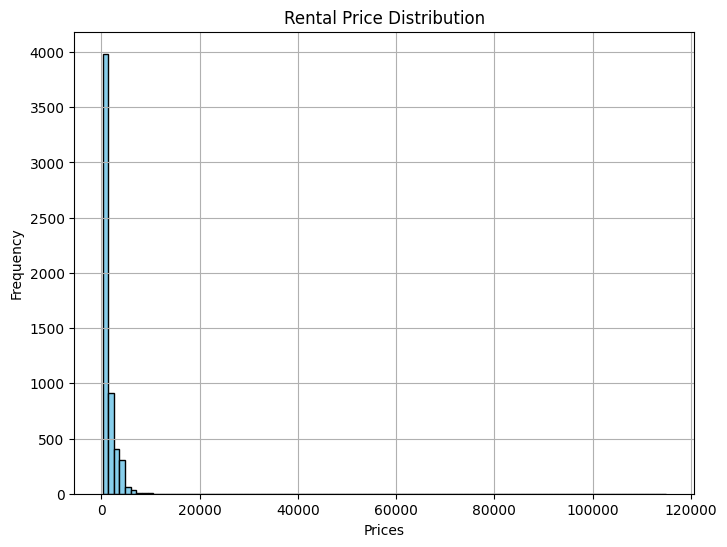

In [64]:
plt.figure(figsize=(8, 6))
plt.hist(merged_df['Average Price'], bins=100, color='skyblue', edgecolor='black')
plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.xlim(0, 800)
plt.title('Rental Price Distribution')
plt.grid(True)
plt.show()

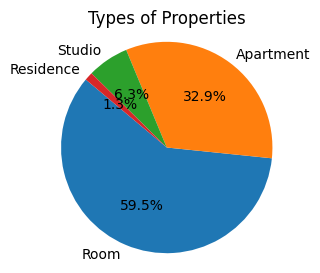

In [51]:
counts = merged_df['House Type'].value_counts()
plt.figure(figsize=(3, 3))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Types of Properties')
plt.axis('equal')
plt.show()

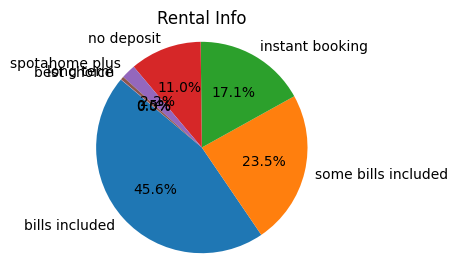

In [52]:
counts = merged_df['Additional Info'].value_counts()
plt.figure(figsize=(3, 3))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Rental Info')
plt.axis('equal')
plt.show()